In [21]:
import numpy as np
import ROOT
from math import exp as expo
from math import cos as cosine
from math import sin as sine
sin=np.vectorize(sine)
exp=np.vectorize(expo)
cos=np.vectorize(cosine)
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import scipy.optimize as opt

In [37]:
file = ROOT.TFile.Open("run2_4hcopy_ratioFR_percalo_cov_mat_0.root")
hist_tmp = ROOT.TH1D()
hist_tmp = file.Get("hcalo_ratio_1")

In [38]:
fit_start=30000
fit_stop=300000
fit_range=hist_tmp.FindBin(fit_stop)-hist_tmp.FindBin(fit_start)+1
y_val=np.empty(shape=(24,fit_range))
y_err=np.empty(shape=(24,fit_range))
x_val=np.empty(shape=(24,fit_range))
y_cov=np.empty(shape=(24,fit_range,fit_range))  

In [39]:
%%time
for icalo in range(0,24):
    hist = ROOT.TH1D()
    hcov = ROOT.TH2D()
    hist = file.Get("hcalo_ratio_"+str(icalo+1))
    for ibin in range (0,fit_range):
        y_val[icalo][ibin]=hist.GetBinContent(ibin+hist.FindBin(fit_start))
        y_err[icalo][ibin]=hist.GetBinError(ibin+hist.FindBin(fit_start))
        x_val[icalo][ibin]=hist.GetBinCenter(ibin+hist.FindBin(fit_start))
        
    hcov = file.Get("hcov_"+str(icalo+1))
    for irow in range (0, fit_range):
        for icol in range(0, fit_range):
            y_cov[icalo][irow][icol]=hcov.GetBinContent(irow+hist.FindBin(fit_start),icol+hist.FindBin(fit_start))
            
    hist.Reset()
    hcov.Reset()

CPU times: user 2min 48s, sys: 36.5 s, total: 3min 24s
Wall time: 3min 24s


In [40]:
for icalo in range(0,24):
    mat=np.linalg.eigvalsh(y_cov[icalo])
    for irow in range (0, fit_range):
        if mat[irow]<=0:
            print(icalo,irow,"\n")

In [41]:
getBlinded = Blinders(FitType.Omega_a, "Ritwika's new  Blinding")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [42]:
T_a_true=4365.411
nbinshift=int((0.5*T_a_true)/hist.GetBinWidth(1))
T_a=2*nbinshift*hist.GetBinWidth(1)

asym=np.empty(24)
dasym=np.empty(24)
rval=np.empty(24)
drval=np.empty(24)
phi=np.empty(24)
dphi=np.empty(24)
A_cbo=np.empty(24)
dA_cbo=np.empty(24)
tau_cbo=np.empty(24)
dtau_cbo=np.empty(24)
omega_cbo=np.empty(24)
domega_cbo=np.empty(24)
phi_cbo=np.empty(24)
dphi_cbo=np.empty(24)
A_cbo_A=np.empty(24)
dA_cbo_A=np.empty(24)
phi_cbo_A=np.empty(24)
dphi_cbo_A=np.empty(24)
A_cbo_phi=np.empty(24)
dA_cbo_phi=np.empty(24)
phi_cbo_phi=np.empty(24)
dphi_cbo_phi=np.empty(24)
A_vw=np.empty(24)
dA_vw=np.empty(24)
tau_vw=np.empty(24)
dtau_vw=np.empty(24)
omega_vw=np.empty(24)
domega_vw=np.empty(24)
phi_vw=np.empty(24)
dphi_vw=np.empty(24)
A_y=np.empty(24)
dA_y=np.empty(24)
tau_y=np.empty(24)
dtau_y=np.empty(24)
omega_y=np.empty(24)
domega_y=np.empty(24)
phi_y=np.empty(24)
dphi_y=np.empty(24)
A_2cbo=np.empty(24)
dA_2cbo=np.empty(24)
tau_2cbo=np.empty(24)
dtau_2cbo=np.empty(24)
omega_2cbo=np.empty(24)
domega_2cbo=np.empty(24)
phi_2cbo=np.empty(24)
dphi_2cbo=np.empty(24)
calonum=np.empty(24)
rval3=np.empty(24)
drval3=np.empty(24)
rval7=np.empty(24)
drval7=np.empty(24)
rval11=np.empty(24)
drval11=np.empty(24)
rval15=np.empty(24)
drval15=np.empty(24)
rval19=np.empty(24)
drval19=np.empty(24)
rval23=np.empty(24)
drval23=np.empty(24)
rval27=np.empty(24)
drval27=np.empty(24)
red_chi2=np.empty(24)

In [43]:
def fit_func3(time: np.double,
              asym: np.double = 0.0, 
              R: np.double = 0.0, 
              phi: np.double = 0.0)-> np.double:
    
    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))

    
    return (2*f - ff - fb)/(2*f + ff + fb) 

In [44]:
def fit_func7(time: np.double,
              asym: np.double = 0.0, 
              R: np.double = 0.0, 
              phi: np.double = 0.0,
              asym_cbo = 0.0,
              tau_cbo = 0.0,
              omega_cbo = 0.0,
              phi_cbo = 0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))

    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))

    
    return (2*f*Ncbo - ff*Ncbof - fb*Ncbob)/(2*f*Ncbo + ff*Ncbof + fb*Ncbob)

In [45]:
def fit_func11(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))


    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo - ff*Ncbof - fb*Ncbob)/(2*f*Ncbo + ff*Ncbof + fb*Ncbob)

In [46]:
def fit_func15(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))

    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo - ff*Ncbof - fb*Ncbob)/(2*f*Ncbo + ff*Ncbof + fb*Ncbob)

In [47]:
def fit_func19(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0)-> np.double:
    
    tau_vw = 94208
    omega_vw = 0.01392

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))

    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw - ff*Ncbof*Nvwf - fb*Ncbob*Nvwb)/(2*f*Ncbo*Nvw + ff*Ncbof*Nvwf + fb*Ncbob*Nvwb)

In [48]:
def fit_func23(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0,
               asym_vbo= 0.0,
               phi_vbo = 0.0)-> np.double:
    
    tau_vw = 94208
    omega_vw = 0.01392
    
    tau_vbo = 25630
    omega_vbo = 0.01402

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))


    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo - ff*Ncbof*Nvwf*Nvbof - fb*Ncbob*Nvwb*Nvbob)/(2*f*Ncbo*Nvw*Nvbo + ff*Ncbof*Nvwf*Nvbof + fb*Ncbob*Nvwb*Nvbob)

In [49]:
def fit_func27(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0,
               asym_vbo= 0.0,
               phi_vbo = 0.0,
               asym_new= 0.0,
               phi_new = 0.0,)-> np.double:
    
    tau_vw = 75360
    omega_vw = 0.01389
    
    tau_vbo = 5500
    omega_vbo = 0.0140986
    
    tau_new = 28000
    omega_new = 0.01428

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))
    Nnew=(1+ asym_new*exp(-time/tau_new)*cos(omega_new*time - phi_new))
    Nnewf=(1+ asym_new*exp(-(time + T_a/2)/tau_new)*cos(omega_new*(time + T_a/2) - phi_new))
    Nnewb=(1+ asym_new*exp(-(time - T_a/2)/tau_new)*cos(omega_new*(time - T_a/2) - phi_new))



    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo*Nnew - ff*Ncbof*Nvwf*Nvbof*Nnewf - fb*Ncbob*Nvwb*Nvbob*Nnewb)/(2*f*Ncbo*Nvw*Nvbo*Nnew + ff*Ncbof*Nvwf*Nvbof*Nnewf + fb*Ncbob*Nvwb*Nvbob*Nnewb)

In [50]:
p_init3=[2.28839e-01,
         0.000000,
         4.02055e+00]

In [51]:
%%time
for icalo in range(0,24): 
    pars3, cov3 = opt.curve_fit(f=fit_func3, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init3, sigma=y_cov[icalo]) 
    
    stdevs3=np.sqrt(np.diag(cov3))
    calonum[icalo]=icalo+1
    rval3[icalo]=pars3[1]
    drval3[icalo]=stdevs3[1]

CPU times: user 18.8 s, sys: 13.6 s, total: 32.5 s
Wall time: 4.58 s


In [52]:
p_init7=[pars3[0],
         pars3[1],
         pars3[2],
         0.05,
         240000,
         0.0023404,
         2.00+(icalo*(6.28/24))]

In [54]:
%%time
for icalo in range(0,24): 
    pars7, cov7 = opt.curve_fit(f=fit_func7, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init7, sigma=y_cov[icalo]) 
    
    stdevs7=np.sqrt(np.diag(cov7))
    calonum[icalo]=icalo+1
    rval7[icalo]=pars7[1]
    drval7[icalo]=stdevs7[1]

CPU times: user 24.5 s, sys: 13.4 s, total: 37.9 s
Wall time: 10.3 s


In [56]:
p_init11=[pars7[0],
          pars7[1],
          pars7[2],
          pars7[3],
          pars7[4],
          pars7[5],
          pars7[6],
          0.02,
          1.1,
          0.003,
          1.2]

In [57]:
%%time
for icalo in range(0,24): 
    pars11, cov11 = opt.curve_fit(f=fit_func11, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init11, sigma=y_cov[icalo]) 
    
    stdevs11=np.sqrt(np.diag(cov11))
    calonum[icalo]=icalo+1
    rval11[icalo]=pars11[1]
    drval11[icalo]=stdevs11[1]

CPU times: user 34.6 s, sys: 13.5 s, total: 48.1 s
Wall time: 20.3 s


In [58]:
rval11

array([-47.77665634, -41.31483017, -41.14695206, -44.24103872,
       -43.03204382, -41.21172527, -46.86993929, -42.93700919,
       -49.30662033, -45.81479496, -45.86305991, -44.76746752,
       -42.406659  , -50.51695572, -44.70170775, -42.76008627,
       -46.59262454, -45.56483427, -48.73990185, -51.13214364,
       -41.89229081, -40.11640395, -36.68895488, -42.32849417])

In [59]:
drval11

array([2.72184685, 2.39935506, 2.72620607, 2.86491283, 2.99856859,
       3.17535077, 3.16522423, 3.07934796, 3.01187746, 2.75532969,
       2.87753468, 2.51800804, 2.58450091, 2.41364229, 2.67955699,
       2.77514601, 2.91275641, 2.51308149, 2.72727299, 2.52331736,
       2.87390522, 2.81509441, 2.93792416, 2.51567864])

In [21]:
p_init15=[pars11[0],
          pars11[1],
          pars11[2],
          pars11[3],
          pars11[4],
          pars11[5],
          pars11[6],
          pars11[7],
          pars11[8],
          pars11[9],
          pars11[10],
          0.001,
          5.1]

In [22]:
%%time
for icalo in range(0,24): 
    pars15, cov15 = opt.curve_fit(f=fit_func15, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init15, sigma=y_err[icalo]) 
    
    stdevs15=np.sqrt(np.diag(cov15))
    calonum[icalo]=icalo+1
    rval15[icalo]=pars15[1]
    drval15[icalo]=stdevs15[1]

CPU times: user 18.7 s, sys: 174 ms, total: 18.9 s
Wall time: 18.5 s


In [23]:
p_init19=[pars15[0],
          pars15[1],
          pars15[2],
          pars15[3],
          pars15[4],
          pars15[5],
          pars15[6],
          pars15[7],
          pars15[8],
          pars15[9],
          pars15[10],
          pars15[11],
          pars15[12],
          0.0005,
          3.5]

In [24]:
%%time
for icalo in range(0,24): 
    pars19, cov19 = opt.curve_fit(f=fit_func19, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init19, sigma=y_err[icalo]) 
    
    stdevs19=np.sqrt(np.diag(cov19))
    calonum[icalo]=icalo+1
    rval19[icalo]=pars19[1]
    drval19[icalo]=stdevs19[1]

CPU times: user 27.6 s, sys: 210 ms, total: 27.8 s
Wall time: 27.2 s


In [25]:
p_init23=[pars19[0],
          pars19[1],
          pars19[2],
          pars19[3],
          pars19[4],
          pars19[5],
          pars19[6],
          pars19[7],
          pars19[8],
          pars19[9],
          pars19[10],
          pars19[11],
          pars19[12],
          pars19[13],
          pars19[14],
          0.001,
          4.2]

In [26]:
%%time
for icalo in range(0,24): 
    pars2, cov2 = opt.curve_fit(f=fit_func23, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init23, sigma=y_err[icalo]) 
    
    stdevs=np.sqrt(np.diag(cov2))
    calonum[icalo]=icalo+1
    rval23[icalo]=pars2[1]
    drval23[icalo]=stdevs[1]
    
    chi2=np.dot((np.transpose(y_val[icalo]-fit_func23(x_val[icalo], *pars2))),(np.dot((np.linalg.inv(y_cov[icalo])),(y_val[icalo]-fit_func23(x_val[icalo], *pars2)))))
    red_chi2[icalo]=chi2/(fit_range-len(pars2))
    
    asym[icalo]=pars2[0]
    dasym[icalo]=stdevs[0]
    rval[icalo]=pars2[1]
    drval[icalo]=stdevs[1]
    phi[icalo]=pars2[2]
    dphi[icalo]=stdevs[2]
    A_cbo[icalo]=pars2[3]
    dA_cbo[icalo]=stdevs[3]
    tau_cbo[icalo]=pars2[4]
    dtau_cbo[icalo]=stdevs[4]
    omega_cbo[icalo]=pars2[5]
    domega_cbo[icalo]=stdevs[5]
    phi_cbo[icalo]=pars2[6]
    dphi_cbo[icalo]=stdevs[6]
    A_cbo_A[icalo]=pars2[7]
    dA_cbo_A[icalo]=stdevs[7]
    phi_cbo_A[icalo]=pars2[8]
    dphi_cbo_A[icalo]=stdevs[8]
    A_cbo_phi[icalo]=pars2[9]
    dA_cbo_phi[icalo]=stdevs[9]
    phi_cbo_phi[icalo]=pars2[10]
    dphi_cbo_phi[icalo]=stdevs[10]
    A_2cbo[icalo]=pars2[11]
    dA_2cbo[icalo]=stdevs[11]
    phi_2cbo[icalo]=pars2[12]
    dphi_2cbo[icalo]=stdevs[12]
    A_y[icalo]=pars2[13]
    dA_y[icalo]=stdevs[13]
    phi_y[icalo]=pars2[14]
    dphi_y[icalo]=stdevs[14]
    A_vw[icalo]=pars2[15]
    dA_vw[icalo]=stdevs[15]
    phi_vw[icalo]=pars2[16]
    dphi_vw[icalo]=stdevs[16]

CPU times: user 4min 9s, sys: 57.8 s, total: 5min 7s
Wall time: 1min 14s


In [27]:
def fit_Rwave(x: np.double,
              amp: np.double = 0.0, 
              phase: np.double = 0.0, 
              offset: np.double = 0.0)-> np.double:
    
    Romega=0.2618
    
    return amp*sin(Romega*x+phase)+offset



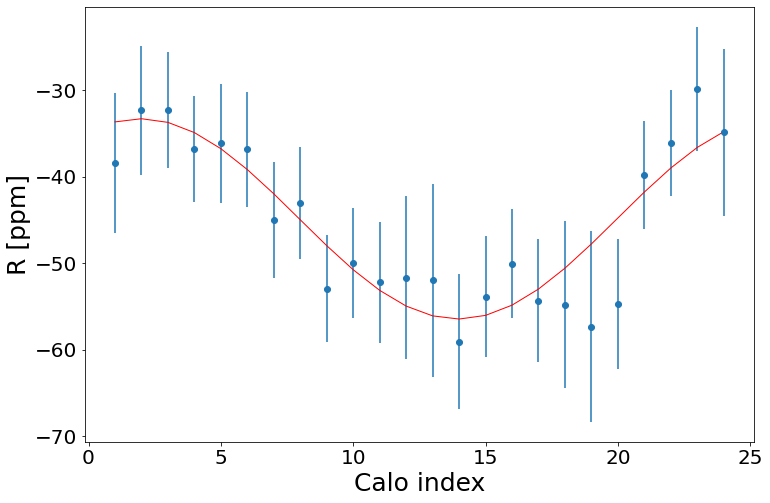

chi2/ndf= 4.877732530759301 /21
amplitude= 11.586489049734473  phase= 1.056215743838981  offset= -44.87781977979496


In [28]:
p_0=[1.0,1.5,-45]

rwave_p, rwave_cov = opt.curve_fit(f=fit_Rwave, xdata=calonum, ydata=rval3, p0=p_0, sigma=drval3)

plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval3, yerr=drval3, fmt="o")
plt.plot(calonum, fit_Rwave(calonum, *rwave_p), linestyle='solid', linewidth=1, color='red')
plt.xlabel('Calo index',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
chi2_1=np.empty(24)
chi2_1=(fit_Rwave(calonum, *rwave_p)-rval3)*(fit_Rwave(calonum, *rwave_p)-rval)/(drval3*drval3)
print('chi2/ndf=',sum(chi2_1),'/21')
print('amplitude=',rwave_p[0],' phase=',rwave_p[1],' offset=',rwave_p[2])


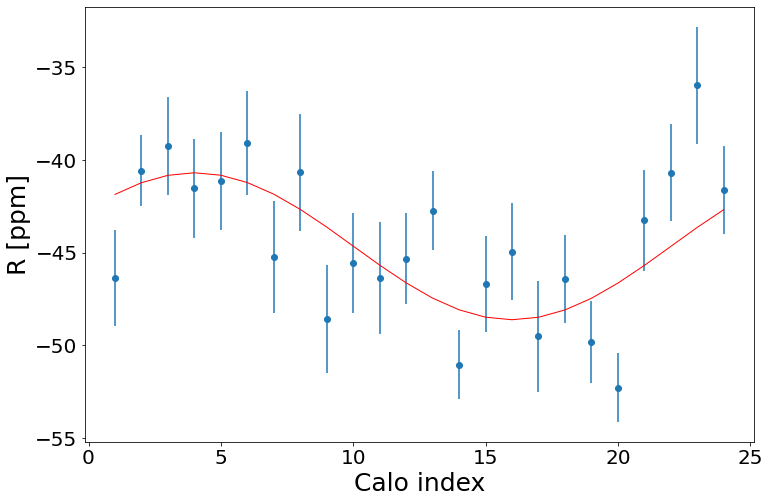

chi2/ndf= 39.336535527494334 /21
amplitude= 3.9669480111411723  phase= 0.521579308339436  offset= -44.65123369903605


In [29]:
p_0=[1.0,1.5,-45]

rwave_p, rwave_cov = opt.curve_fit(f=fit_Rwave, xdata=calonum, ydata=rval7, p0=p_0, sigma=drval7)

plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval7, yerr=drval7, fmt="o")
plt.plot(calonum, fit_Rwave(calonum, *rwave_p), linestyle='solid', linewidth=1, color='red')
plt.xlabel('Calo index',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
chi2_1=np.empty(24)
chi2_1=(fit_Rwave(calonum, *rwave_p)-rval7)*(fit_Rwave(calonum, *rwave_p)-rval7)/(drval7*drval7)
print('chi2/ndf=',sum(chi2_1),'/21')
print('amplitude=',rwave_p[0],' phase=',rwave_p[1],' offset=',rwave_p[2])
#plt.savefig('run3btom_caloscan_Rfit_sine.jpg')

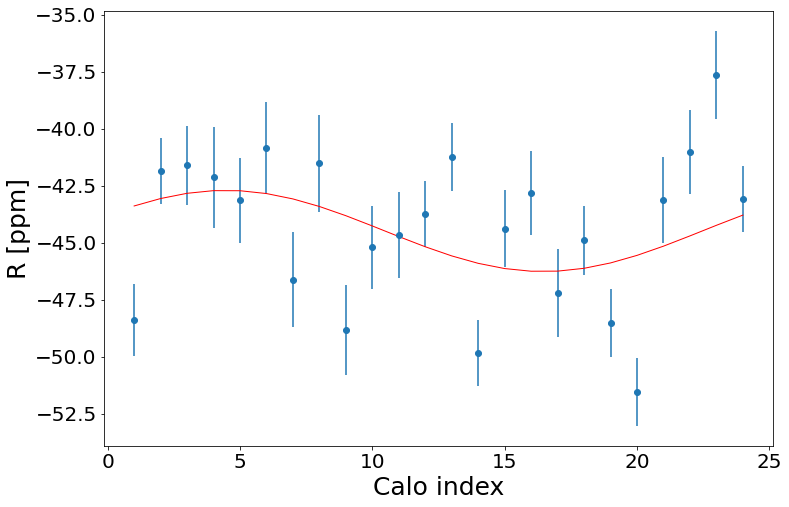

chi2/ndf= 81.34572745332711 /21
amplitude= 1.7794159388030488  phase= 0.40064803158285633  offset= -44.48314972362743


In [30]:
p_0=[1.0,1.5,-45]

rwave_p, rwave_cov = opt.curve_fit(f=fit_Rwave, xdata=calonum, ydata=rval11, p0=p_0, sigma=drval11)

plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval11, yerr=drval11, fmt="o")
plt.plot(calonum, fit_Rwave(calonum, *rwave_p), linestyle='solid', linewidth=1, color='red')
plt.xlabel('Calo index',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
chi2_1=np.empty(24)
chi2_1=(fit_Rwave(calonum, *rwave_p)-rval11)*(fit_Rwave(calonum, *rwave_p)-rval11)/(drval11*drval11)
print('chi2/ndf=',sum(chi2_1),'/21')
print('amplitude=',rwave_p[0],' phase=',rwave_p[1],' offset=',rwave_p[2])
#plt.savefig('run3btom_caloscan_Rfit_sine.jpg')

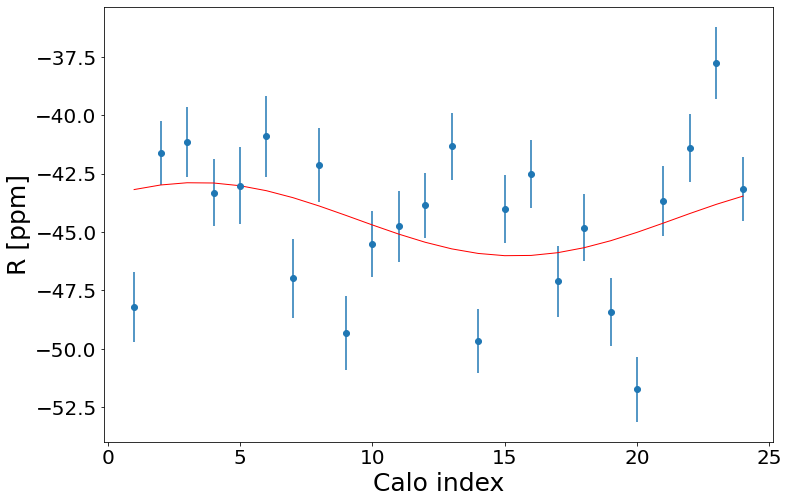

chi2/ndf= 105.13898177375398 /21
amplitude= 1.570606890874838  phase= 0.6804579516761514  offset= -44.44932470196398


In [31]:
p_0=[1.0,1.5,-45]

rwave_p, rwave_cov = opt.curve_fit(f=fit_Rwave, xdata=calonum, ydata=rval15, p0=p_0, sigma=drval15)

plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval15, yerr=drval15, fmt="o")
plt.plot(calonum, fit_Rwave(calonum, *rwave_p), linestyle='solid', linewidth=1, color='red')
plt.xlabel('Calo index',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
chi2_1=np.empty(24)
chi2_1=(fit_Rwave(calonum, *rwave_p)-rval15)*(fit_Rwave(calonum, *rwave_p)-rval15)/(drval15*drval15)
print('chi2/ndf=',sum(chi2_1),'/21')
print('amplitude=',rwave_p[0],' phase=',rwave_p[1],' offset=',rwave_p[2])
#plt.savefig('run3btom_caloscan_Rfit_sine.jpg')

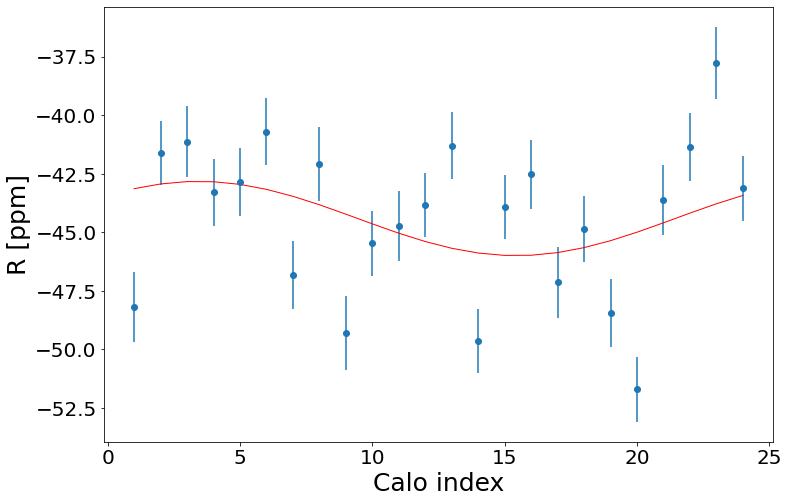

chi2/ndf= 108.31843434304476 /21
amplitude= 1.5858535558965803  phase= 0.6688737109959344  offset= -44.40952397565372


In [32]:
p_0=[1.0,1.5,-45]

rwave_p, rwave_cov = opt.curve_fit(f=fit_Rwave, xdata=calonum, ydata=rval19, p0=p_0, sigma=drval19)

plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval19, yerr=drval19, fmt="o")
plt.plot(calonum, fit_Rwave(calonum, *rwave_p), linestyle='solid', linewidth=1, color='red')
plt.xlabel('Calo index',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
chi2_1=np.empty(24)
chi2_1=(fit_Rwave(calonum, *rwave_p)-rval19)*(fit_Rwave(calonum, *rwave_p)-rval19)/(drval19*drval19)
print('chi2/ndf=',sum(chi2_1),'/21')
print('amplitude=',rwave_p[0],' phase=',rwave_p[1],' offset=',rwave_p[2])
#plt.savefig('run3btom_caloscan_Rfit_sine.jpg')

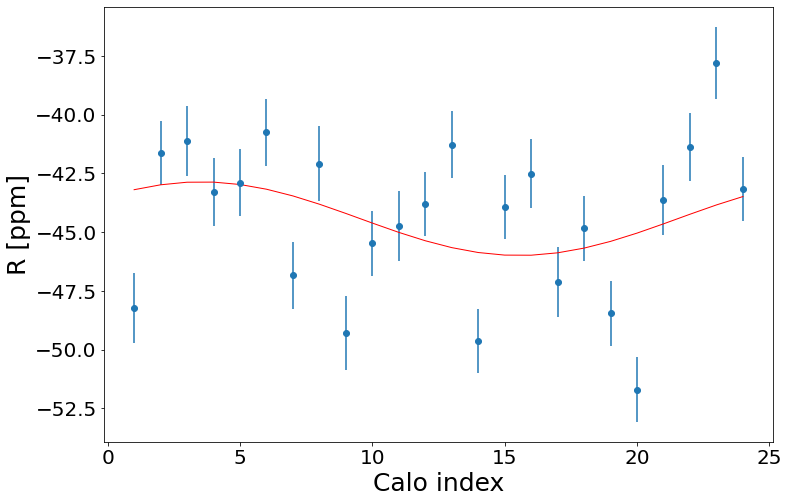

chi2/ndf= 110.56098752404965 /21
amplitude= 1.5659818704319104  phase= 0.6434585291728792  offset= -44.42976801490838


In [33]:
p_0=[1.0,1.5,-45]

rwave_p, rwave_cov = opt.curve_fit(f=fit_Rwave, xdata=calonum, ydata=rval, p0=p_0, sigma=drval)

plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval, yerr=drval, fmt="o")
plt.plot(calonum, fit_Rwave(calonum, *rwave_p), linestyle='solid', linewidth=1, color='red')
plt.xlabel('Calo index',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
chi2_1=np.empty(24)
chi2_1=(fit_Rwave(calonum, *rwave_p)-rval)*(fit_Rwave(calonum, *rwave_p)-rval)/(drval*drval)
print('chi2/ndf=',sum(chi2_1),'/21')
print('amplitude=',rwave_p[0],' phase=',rwave_p[1],' offset=',rwave_p[2])
#plt.savefig('run3btom_caloscan_Rfit_sine.jpg')

In [34]:
rval_13par=np.empty(24)
drval_13par=np.empty(24)
calonum_1=np.empty(24)
rval_13par=[-44.48378828, -38.5706837 , -38.73659909, -45.35841995,
       -42.57456149, -41.57023089, -42.73281345, -40.15440146,
       -44.85831742, -40.89577411, -45.9350494 , -40.99597566,
       -37.09871786, -52.35550158, -41.37756792, -50.86703395,
       -47.2980436 , -44.68485876, -50.03735238, -47.30174741,
       -43.19166988, -44.47822706, -33.09412228, -42.32611563]
drval_13par=[2.27883919, 1.98580148, 2.26084709, 2.25889501, 2.2608537 ,
       2.22296426, 2.42096028, 2.54094822, 2.42160585, 2.12296669,
       2.40852572, 2.23436784, 2.21184431, 2.0872828 , 2.14855981,
       2.17478181, 2.37384634, 2.05339914, 2.13537757, 2.17572952,
       2.25496279, 2.17464342, 2.41582137, 2.14628073]

In [35]:
for icalo in range(0,24):
    calonum_1[icalo]=calonum[icalo]+0.1

plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval11, yerr=drval11, fmt="o")
plt.errorbar(calonum_1, rval_13par, yerr=drval_13par, fmt="o")

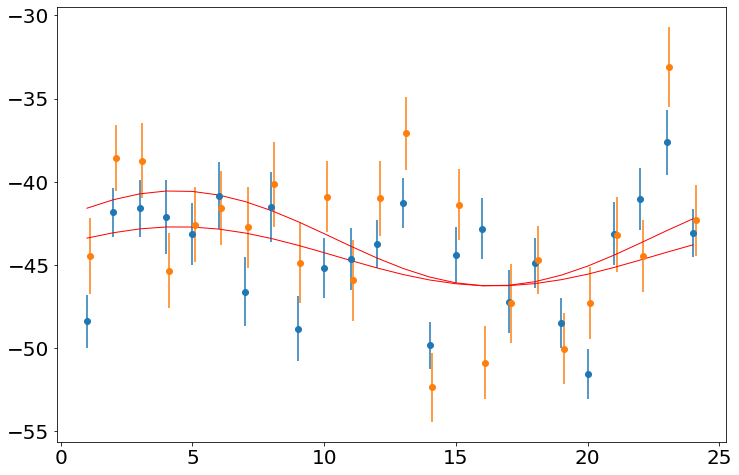

In [36]:
rwave_p, rwave_cov = opt.curve_fit(f=fit_Rwave, xdata=calonum, ydata=rval11, p0=p_0, sigma=drval11)
rwave_p_1, rwave_cov_1 = opt.curve_fit(f=fit_Rwave, xdata=calonum, ydata=rval_13par, p0=p_0, sigma=drval_13par)

plt.figure(figsize=(12,8)) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval11, yerr=drval11, fmt="o",label="FR") 
plt.plot(calonum, fit_Rwave(calonum, *rwave_p), linestyle='solid', linewidth=1, color='red')
plt.errorbar(calonum_1, rval_13par, yerr=drval_13par, fmt="o",label="noFR")
plt.plot(calonum, fit_Rwave(calonum_1, *rwave_p_1), linestyle='solid', linewidth=1, color='red')

In [37]:
rval_noFR=np.empty(24)
rval_noFR=[-41.38329115, -35.8962176 , -36.49055066, -43.8955665 ,
       -41.20166879, -41.02158435, -42.77875591, -40.93657478,
       -46.30062623, -42.71264829, -48.63705583, -44.09209294,
       -41.00768892, -55.33578325, -44.07658861, -52.69168749,
       -48.90046639, -46.8567344 , -51.63538931, -47.4895919 ,
       -41.60900171, -42.61398548, -30.33581008, -39.32375588]

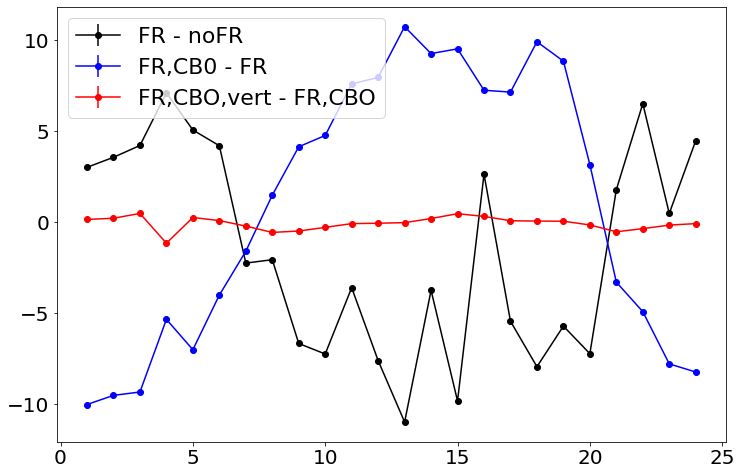

In [38]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval3-rval_noFR, yerr=0, fmt="-o", color='black',label='FR - noFR')
plt.errorbar(calonum, rval11-rval3, yerr=0, fmt="-o", color='blue',label='FR,CB0 - FR')
plt.errorbar(calonum, rval-rval11, yerr=0, fmt="-o", color='red',label='FR,CBO,vert - FR,CBO')
plt.legend(loc=2, prop={'size': 22})
plt.show()

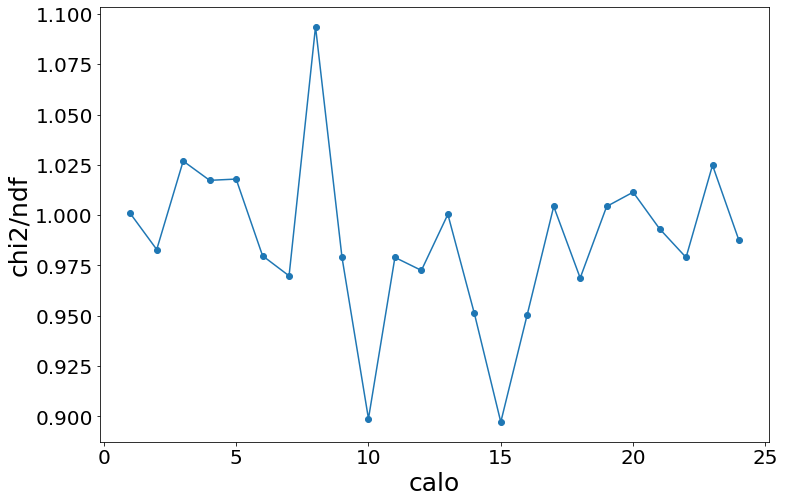

In [39]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, red_chi2, yerr=0, fmt="-o")
plt.xlabel('calo',fontsize=25)
plt.ylabel('chi2/ndf',fontsize=25)
plt.show()

In [40]:
rval

array([-48.23726872, -41.63413765, -41.13130693, -43.29728789,
       -42.89295484, -40.75106809, -46.84180628, -42.08604709,
       -49.31469797, -45.48188733, -44.73751176, -43.81134312,
       -41.28218192, -49.63509209, -43.92175641, -42.50972724,
       -47.12771731, -44.83900859, -48.45868834, -51.70680699,
       -43.65033971, -41.38461645, -37.80254206, -43.16270047])

In [41]:
rval_rand=np.array([-46.650397, -42.692886, -43.090200, -42.801175, -42.951434, -40.773040, -44.122916, -42.069090, -48.191754, -46.034348, -44.010173, -45.183546, -42.279457, -50.138934, -45.339752, -44.105977, -45.679302, -46.610262, -48.609203, -49.006812, -44.295337, -41.046030, -41.558796, -43.167045])
drval_rand=np.array([2.3432431, 2.0991027, 2.2324074, 2.2504511, 2.2165943, 2.2573041, 2.2431799, 2.2583440, 2.4307672, 2.2525475, 2.3139127, 2.1754848, 2.1921333, 2.1416342, 2.2216673, 2.2599902, 2.2835885, 2.1525873, 2.2432353, 2.1374037, 2.2794163, 2.2456661, 2.3086952, 2.1509935])

In [42]:
calonum_1=np.empty(24)
for i in range(0,24):
    calonum_1[i]=calonum[i]+0.1

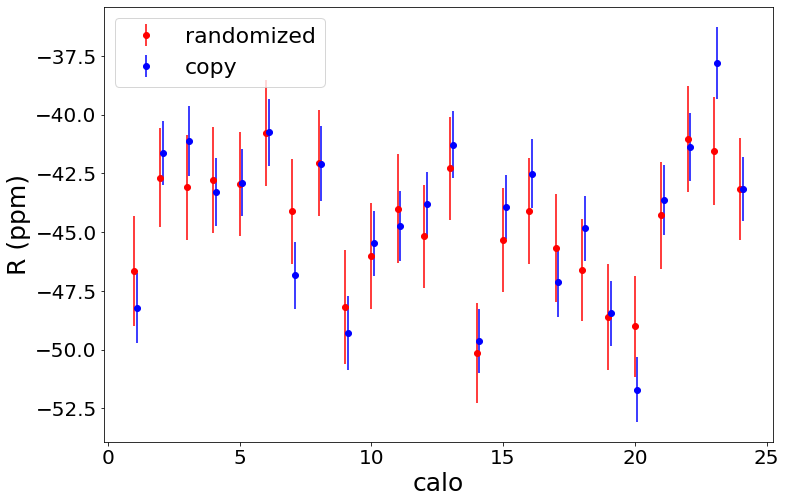

In [43]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
#plt.errorbar(calonum, np.absolute(rval-rval_rand), yerr=0, fmt="-o", color='black',label='copy-randomized')
plt.errorbar(calonum, rval_rand, yerr=drval_rand, fmt="o", color='red',label='randomized')
plt.errorbar(calonum_1, rval, yerr=drval, fmt="o", color='blue',label='copy')
plt.legend(loc=2, prop={'size': 22})
plt.xlabel('calo',fontsize=25)
plt.ylabel('R (ppm)',fontsize=25)
plt.show()

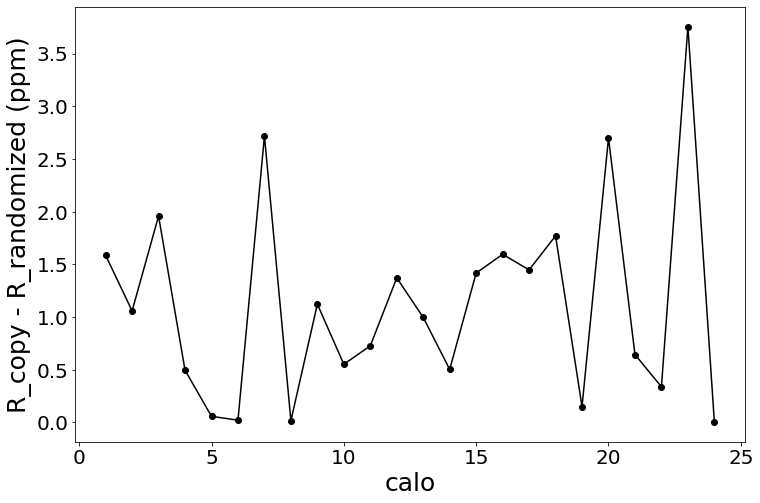

In [44]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, np.absolute(rval-rval_rand), yerr=0, fmt="-o", color='black',label='copy-randomized')
#plt.legend(loc=2, prop={'size': 22})
plt.xlabel('calo',fontsize=25)
plt.ylabel('R_copy - R_randomized (ppm)',fontsize=25)
plt.show()